# Странный аттрактор Лоренца

Лоренц изучал конвекцию (теплообмен, возникающий за счет движения молекул жидкости или газа) в атмосфере Земли. Для описания подобных физических процессов часто пользуются моделью, которая включает в себя уравнения Навье-Стокса, описывающие движение вязкой ньютоновской жидкости (за исключением некоторых частных случаев, их решения в общем виде на данный момент неизвестны)

Лоренцу в результате многостраничных выкладок удалось построить достаточно простую систему:

$$
\begin{cases}
\frac{dx}{dt} = σ(y-x)\\
\frac{dy}{dt} = x(ρ - z) - y\\
\frac{dz}{dt} = xy - βz
\end{cases}
$$

x отвечает за интенсивность конвекции;
y отображает разность между температурами входящих и нисходящих потоков;
z характеризует отклонение вертикального температурного профиля от линейной зависимости;
σ > 1 — число Прандтля (критерий подобия тепловых процессов в жидкостях и газах);
ρ > 0 — число Рэлея (отображает поведение жидкости под воздействием градиента температуры);
β > 0 — число, отражающее геометрию конвективной ячейки.

С помощью этой системы уравнений можно рассчитать, как будет вести себя текучая среда, которую равномерно разогревают снизу и охлаждают сверху. Так, как это происходит с воздушными потоками в атмосфере. В частности, она позволяет понять, к какому результату приведет даже небольшое изменение исходных параметров.

Воспользуемся теми же параметрами что и сам Лорентц σ = 10, ρ = 28, β = 8/3.

In [2]:
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


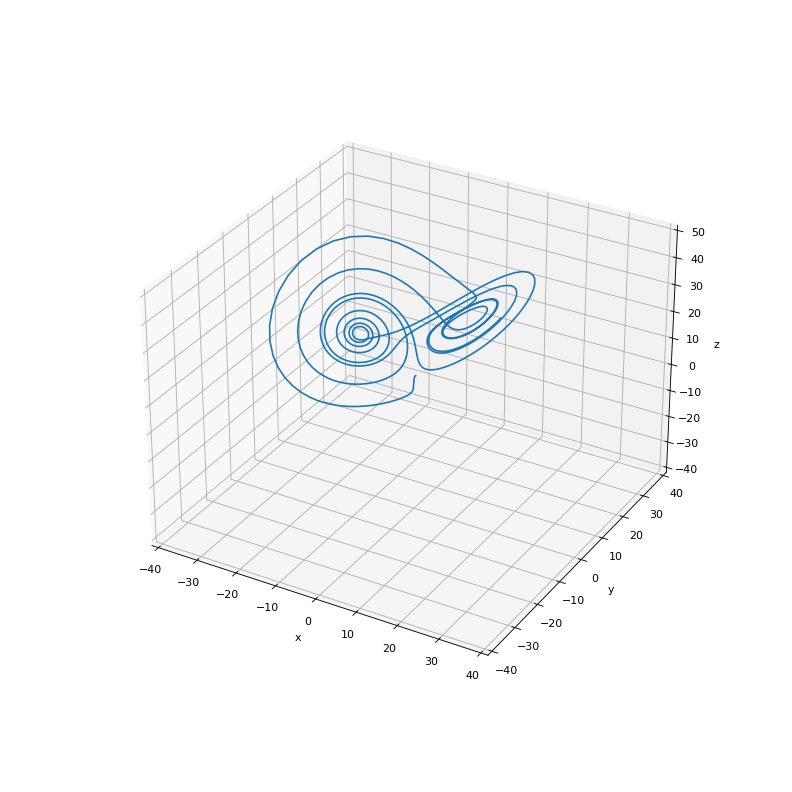

/usr/lib/python3/dist-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [3]:
# График 1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def lorenz(xyz, *, s=10, r=28, b=8/3):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    # функция возвращает значения производных в заданной точке
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


def update_graph(i):
    # вычисления следующего значения системы дифференциальных уравнений по предыдущей
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

    
def update_line(num):
    # обновляем линию
    update_graph(num)  # вычисляем очередную точку
    line.set_data(xyzs[:num, :2].T)  # x и y отправляем в set_data
    line.set_3d_properties(xyzs[:num, 2])  # а z отправляем в set_3d_properties
    return line


dt = 0.01
num_steps = 1000

xyzs = np.empty((num_steps + 1, 3))  # создаем пустой массив размером num_steps + 1 на 3
xyzs[0] = (1., -1., 10)  # инициализируем начальными значениями 


fig = plt.figure(figsize=(10, 10))  # создаем полотно для графика
ax = fig.add_subplot(projection="3d")  # создаем 3х мерный график

line = ax.plot([], [], [])[0]  # создаем линию пустую

ax.set(xlim3d=(-40, 40), xlabel='x')  # задаем границы для осей и их название
ax.set(ylim3d=(-40, 40), ylabel='y')
ax.set(zlim3d=(-40, 50), zlabel='z')

# запускаем цикл анимации
ani = animation.FuncAnimation(fig, update_line, num_steps, interval=1, repeat=False)

plt.show()

Если брать например ось x то значения больше нуля и меньше нуля в рамках модели можно интерпретировать как ясные и дождливые дни. 

отобразим без анимации:

<IPython.core.display.Javascript object>


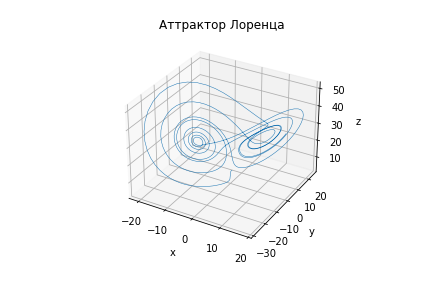

In [3]:
# График 2
import numpy as np
import matplotlib.pyplot as plt


def lorenz(xyz, *, s=10, r=28, b=8/3):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 1000

xyzs = np.empty((num_steps + 1, 3)) 
xyzs[0] = (1., -1., 10)  


for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

# .T транспонирование  (колонки станут строками, а строки - колонками)
ax.plot(*xyzs.T, lw=0.5)  # lw ширина линии

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Аттрактор Лоренца")

plt.show()

Возьмем две близкие точки - почти одинаковые условия атмосферных данных и посмотрим как разовьется "погода" спустя время

<IPython.core.display.Javascript object>


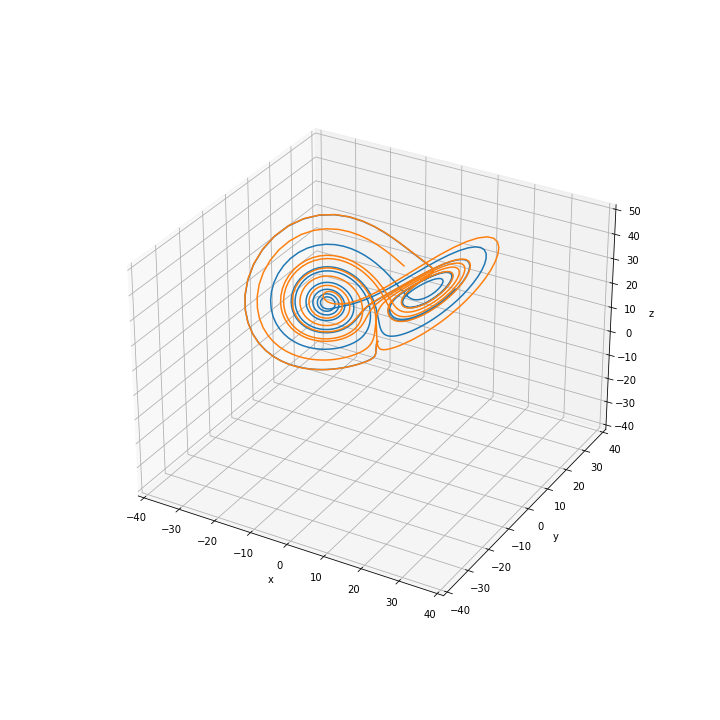

In [4]:
# График 3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def lorenz(xyz, *, s=10, r=28, b=8/3):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    # функция возвращает значения производных в заданной точке
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


def update_graph(i):
    # вычисления следующего значения системы дифференциальных уравнений по предыдущей
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt
    xyzs2[i + 1] = xyzs2[i] + lorenz(xyzs2[i]) * dt

    
def update_line(num):
    # обновляем линию
    update_graph(num)  # вычисляем очередную точку
    line.set_data(xyzs[:num, :2].T)  # x и y отправляем в set_data
    line.set_3d_properties(xyzs[:num, 2])  # а z отправляем в set_3d_properties
    line2.set_data(xyzs2[:num, :2].T)  # x и y отправляем в set_data
    line2.set_3d_properties(xyzs2[:num, 2])  # а z отправляем в set_3d_properties
    return [line, line2]


dt = 0.01
num_steps = 1000

xyzs = np.empty((num_steps + 1, 3))  # создаем пустой массив размером num_steps + 1 на 3
xyzs2 = np.empty((num_steps + 1, 3))
xyzs[0] = (1., -1., 10)  # инициализируем начальными значениями
xyzs2[0] = (1.001, -1., 10)


fig = plt.figure(figsize=(10, 10))  # создаем полотно для графика
ax = fig.add_subplot(projection="3d")  # создаем 3х мерный график

line = ax.plot([], [], [])[0]  # создаем линию пустую
line2 = ax.plot([], [], [])[0]

ax.set(xlim3d=(-40, 40), xlabel='x')  # задаем границы для осей и их название
ax.set(ylim3d=(-40, 40), ylabel='y')
ax.set(zlim3d=(-40, 50), zlabel='z')

# запускаем цикл анимации
ani = animation.FuncAnimation(fig, update_line, num_steps, interval=1, repeat=False)

plt.show()

Видим что за 1000 шагов мы получили принципиальное расхождение между кривыми. Если рассматривать как x > 0 это ясная погода, а x < 0 это дождь то при практически идентичных начальных параметрах мы получили кардинальное отличие в поведении. 

## 1. задача 
сделайте график процесса выше без анимации на основе 'График 2' без анимации выше.

## 2. задача
сделайте таблицу в pandas с колонками: итерация, точка1, точка2, расстояние
и заполните ее итерация это i в update_graph, точка1 ставится 'дождь' если значение из xyzs[i] < 0 и ясно если больше 0. Аналогично для точка2 и xyzs2. В колонку расстояние напишите евклидово расстояние между этими трехмерными точками.

Давайте рассмотрим теперь две разные точки

<IPython.core.display.Javascript object>


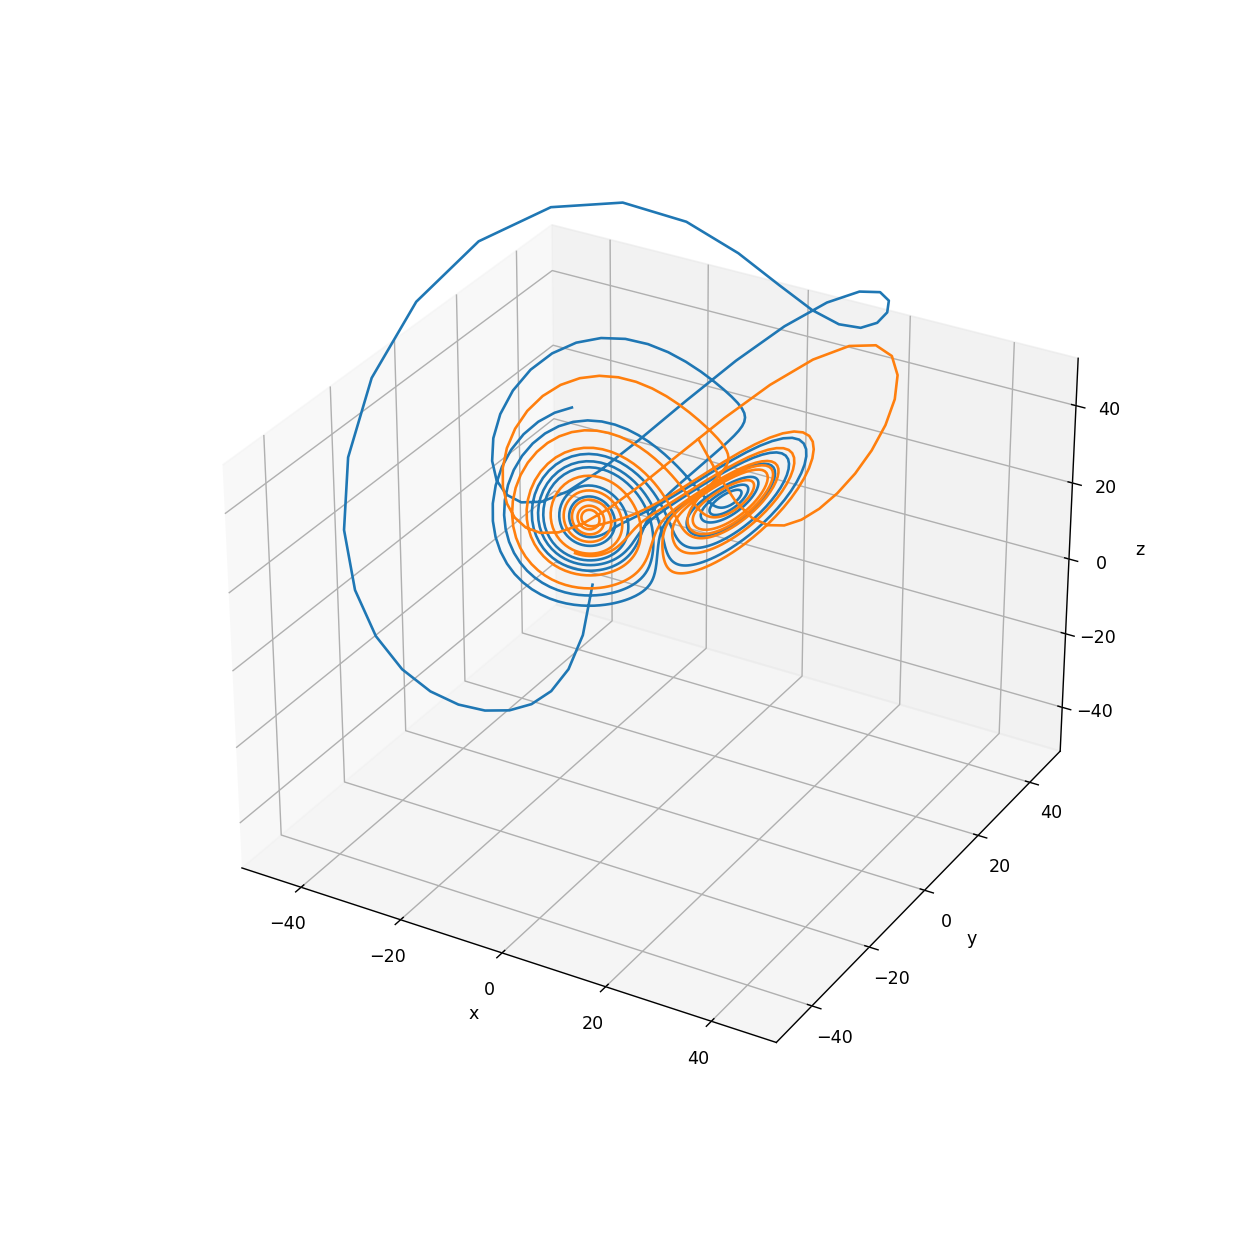

In [38]:
# График 4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def lorenz(xyz, *, s=10, r=28, b=8/3):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    # функция возвращает значения производных в заданной точке
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


def update_graph(i):
    # вычисления следующего значения системы дифференциальных уравнений по предыдущей
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt
    xyzs2[i + 1] = xyzs2[i] + lorenz(xyzs2[i]) * dt

    
def update_line(num):
    # обновляем линию
    update_graph(num)  # вычисляем очередную точку
    line.set_data(xyzs[:num, :2].T)  # x и y отправляем в set_data
    line.set_3d_properties(xyzs[:num, 2])  # а z отправляем в set_3d_properties
    line2.set_data(xyzs2[:num, :2].T)  # x и y отправляем в set_data
    line2.set_3d_properties(xyzs2[:num, 2])  # а z отправляем в set_3d_properties
    return [line, line2]


dt = 0.01
num_steps = 1000

xyzs = np.empty((num_steps + 1, 3))  # создаем пустой массив размером num_steps + 1 на 3
xyzs2 = np.empty((num_steps + 1, 3))
xyzs[0] = (-25, 20, -15)  # инициализируем начальными значениями
xyzs2[0] = (-15, 40, 15)



fig = plt.figure(figsize=(10, 10))  # создаем полотно для графика
ax = fig.add_subplot(projection="3d")  # создаем 3х мерный график

line = ax.plot([], [], [])[0]  # создаем линию пустую
line2 = ax.plot([], [], [])[0]

ax.set(xlim3d=(-50, 50), xlabel='x')  # задаем границы для осей и их название
ax.set(ylim3d=(-50, 50), ylabel='y')
ax.set(zlim3d=(-50, 50), zlabel='z')

# запускаем цикл анимации
ani = animation.FuncAnimation(fig, update_line, num_steps, interval=1, repeat=False)

plt.show()

Получилось что точки которые были на удалении друг от друга, в какой-то момент приблизились. 

## 3. задача
Сделайте такую же таблицу как в задаче 2 для двух точек из 'График 4'

In [34]:
# Посмотрим на метод odeint из библиотеки scipy
from scipy.integrate import odeint

In [35]:
def lorenz(xyz, t, s=10, r=28, b=8/3):
    # функция возвращает значения производных в заданной точке
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

t = np.linspace(0,20,2001)
v0 = [-8, 8, 27]

x, y, z =odeint(f, v0, t, full_output=False).T

In [36]:
x

array([-8.        , -6.48640307, -5.13801767, ...,  0.78986383,
        0.86887154,  0.94837274])

с помощью этого метода можно производить численное интегрирование, если передать ему функцию которая принимает точку-вектор и переменную по которой идет интегрирование (в нашем случае это t время), передать начальный вектор и списко t то odeint проинтегрирует и вернет результат.

## 4. задача
Воспроизведите график 3 и график 4 используя вместо метода Эйлера встроенную функцию odeint
Отличаются ли графики? Почему? Где в функции odeint мы задаем размер шага?

## 5. задача
Сгенерируйте 10000 случайных трехмерных точек в рамках значений от -20 до 20. Сгенерируйте еще 10000 случайных точек с теми же параметрами. Посчитайте расстояние от первых точек до вторых соответственно:

x11 x21  d1  
x12 x22  d2  
x13 x23  d3  
...
x1n x2n  dn  

## 6. задача
сгруппируйте точки в группу по расстоянию (далее будем называть это группы)
d < 0.01
0.01 <= d < 1
1 <= d < 2
2 <= d < 3
3 <= d < 4
...

int(maxd) <= d < int(maxd) + 1


## 7. задача
для каждой группы у вас наберется какое-то количество пар точек x1 и x2 из первой и второй генерации
для каждой группы и каждой пары точек в группе запустите интегрирование для аттрактора Лоренца c помощью функции odeint и посчитайте максимальное и минимальное расстояние между кривыми на одинаковых итерациях

## 8. задача
для каждой группы найдите среднее, максимальное и минимальное расстояние из максимумов и минимумов посчитанных на задаче 7

## 9. задача
посторойте графики

- максимальное максимальных расстояние в группе от типа группы (тип группы это правое ограничение группы например < 0.01)
- среднее  максимальных расстояние в группе от типа группы
- минимальное максимальное расстояние в группе от типа группы

- максимальное минимальное расстояние в группе от типа группы
- среднее минимальное расстояние в группе от типа группы
- минимальное минимальное расстояние в группе от типа группы



Детерминизм зачастую приравнивался к предсказуемости, но Лоренцу удалось показать, что детерминизм способен дать лишь краткосрочное предсказание поведения системы, тогда как в долгосрочной перспективе последствия могут быть непредсказуемы. Именно это и означает термин «хаос».

Однако не стоит путать хаос с хаотичностью — аттрактор Лоренца яркий тому пример, ведь все траектории так или иначе ограничены и не покидают определенное множество.

А что же погода? Работа Лоренца привела к усовершенствованию систем, используемых для составления ее прогнозов:

- на метеостанциях стали собирать значительно больше данных;  
- для вычислений в симуляциях моделей начали использоваться методы, позволяющие добиться большей точности;  
- метеорологи, проводящие эксперименты, осознали важность чувствительности системы к начальным условиям — они запускают большое количество симуляций, входные данные для которых обладают едва заметной разницей, и таким образом явление, происходящее в большинстве случаев, «признается» наиболее вероятным.

"Теоретически прогнозировать погоду по дням в деталях можно на две недели, а практически, на современном уровне развития науки, — на 5-7 дней. Я могу, конечно, повторить любимые мантры метеорологов: атмосфера — это хаотическая система с хорошо выраженной диссипацией и тому подобное.

На самом деле прогноз погоды... — это решение системы дифференциальных уравнений. Точность результата, то есть точность решения этих уравнений, зависит от начальных данных. Так вот, согласно современному пониманию фундаментальных законов природы, теоретическая минимальная ошибка начальных данных ведет к тому, что через две недели решение задачи перестает зависеть от этих самых начальных данных.

Другими словами, как бы мы ни старалась, спрогнозировать ситуацию более чем на две недели вперед уже невозможно. Увы! И это такая непростая философская ситуация, которую впервые осознали именно метеорологи: сколько ни развивай науку, две недели — это порог, и за этим порогом невозможно по дням прогнозировать."

Из интервью Романа Вильфанда, научного руководителя Гидрометцентра России